In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"/content/loan_data.csv")
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [ ]:
###DATA PREPARATION,MINING
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

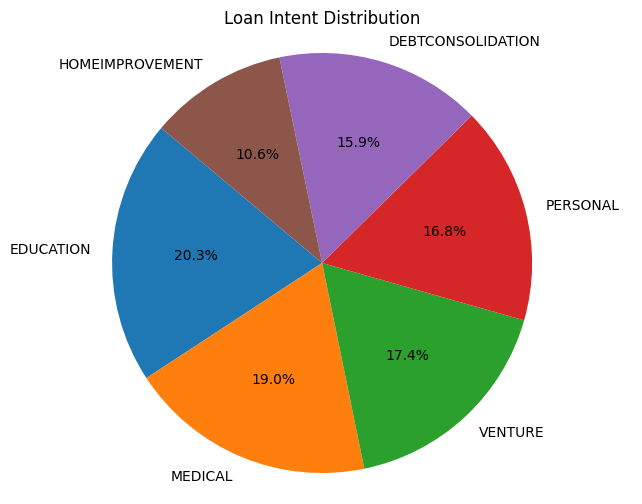

In [3]:
import matplotlib.pyplot as plt


categories = df["loan_intent"].value_counts().index.tolist()
values = df["loan_intent"].value_counts().values.tolist()


plt.figure(figsize=(8, 6))
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title('Loan Intent Distribution')
plt.axis('equal')
plt.show()

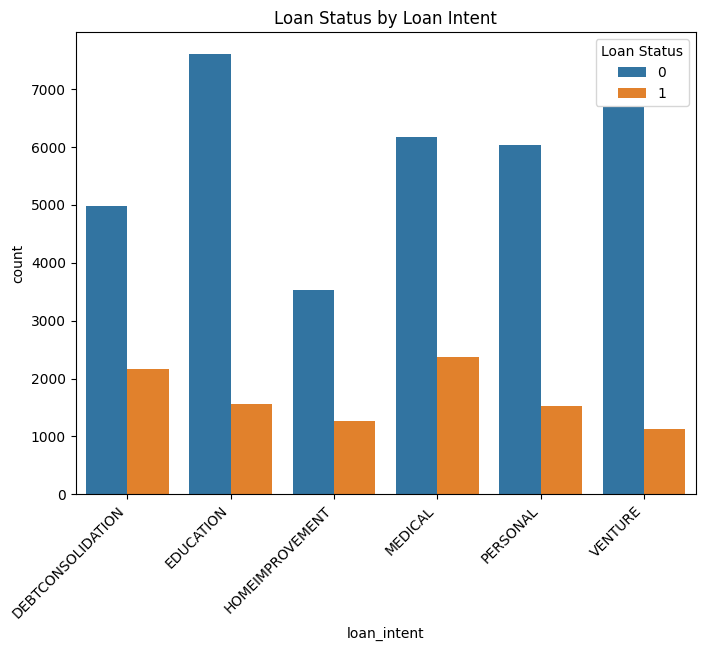

In [ ]:


loan_status_by_intent = df.groupby(['loan_intent', 'loan_status'])['loan_status'].count().reset_index(name='count')

plt.figure(figsize=(8, 6))
sns.barplot(x='loan_intent', y='count', hue='loan_status', data=loan_status_by_intent, dodge=True)
plt.title('Loan Status by Loan Intent')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loan Status')
plt.show()

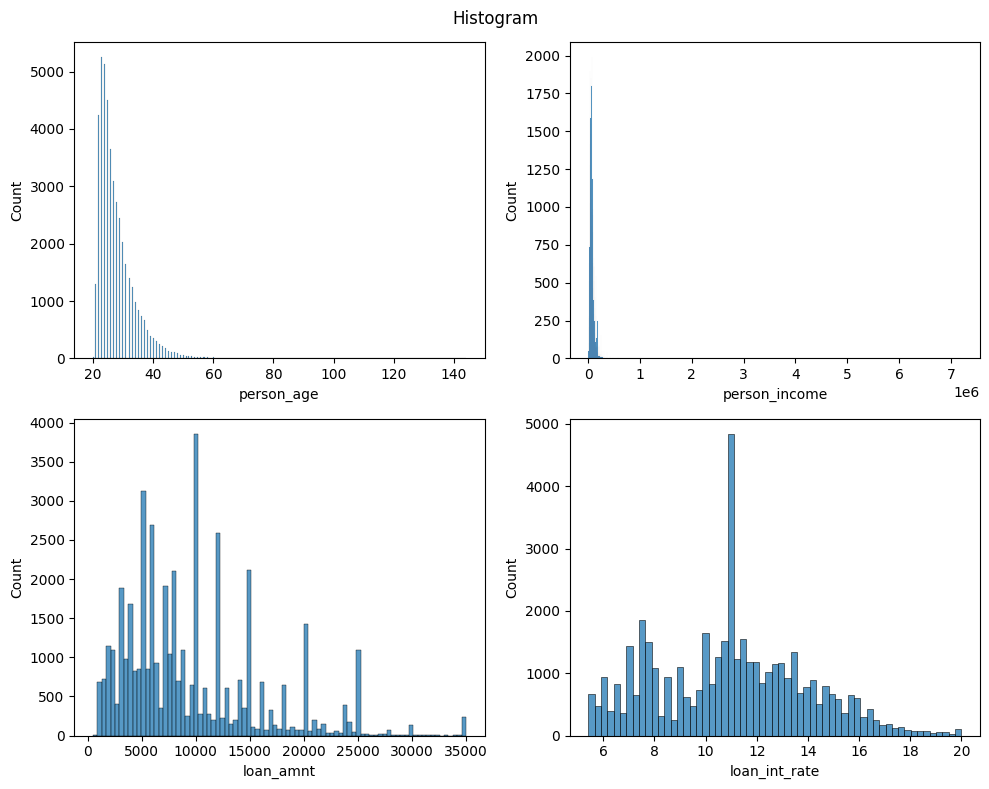

In [19]:
fig,axes=plt.subplots(2,2,figsize=(10,8))
plt.suptitle("Histogram")

sns.histplot(x="person_age",data=df,ax=axes[0,0])
sns.histplot(x="person_income",data=df,ax=axes[0,1])
sns.histplot(x="loan_amnt",data=df,ax=axes[1,0])
sns.histplot(x="loan_int_rate",data=df,ax=axes[1,1])

plt.tight_layout()
plt.show()

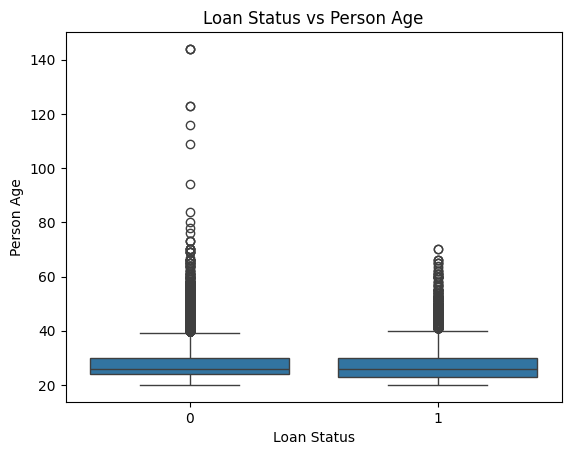

In [9]:
sns.boxplot(x="loan_status",y="person_age",data=df)
plt.xlabel("Loan Status")
plt.ylabel("Person Age")
plt.title("Loan Status vs Person Age")
plt.show()

In [25]:
import plotly.express as px

fig = px.scatter(df, x="loan_amnt", y="person_income", color="loan_status",
                 hover_data=['person_age', 'loan_intent'],
                 title="Person Income vs Loan Amount")
fig.update_layout(xaxis_title="Loan Amount", yaxis_title="Person Income")
fig.show()

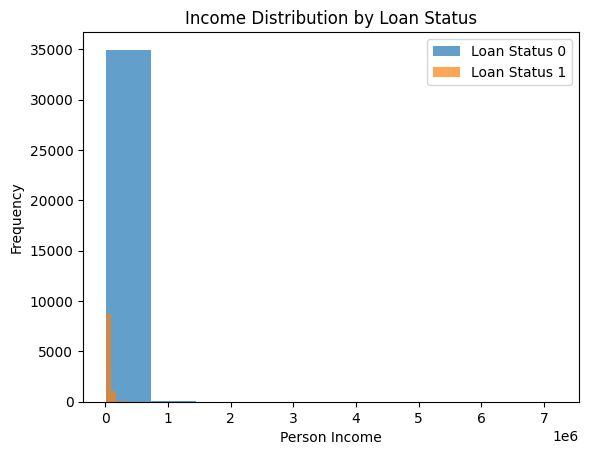

In [ ]:
plt.hist(df[df["loan_status"] == 0]["person_income"], label="Loan Status 0", alpha=0.7)
plt.hist(df[df["loan_status"] == 1]["person_income"], label="Loan Status 1", alpha=0.7)
plt.title("Income Distribution by Loan Status")
plt.xlabel("Person Income")
plt.ylabel("Frequency")
plt.legend()
plt.show()

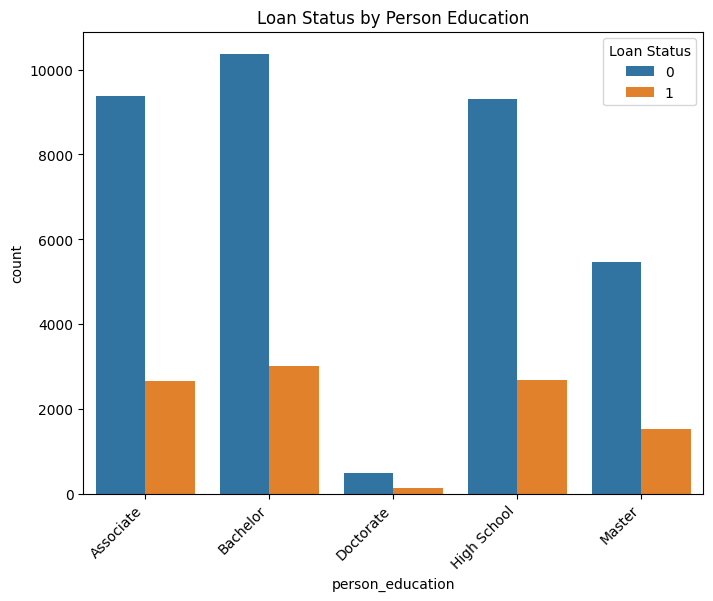

In [4]:

loan_status_by_person_education = df.groupby(['person_education', 'loan_status'])['loan_status'].count().reset_index(name='count')

plt.figure(figsize=(8, 6))
sns.barplot(x='person_education', y='count', hue='loan_status', data=loan_status_by_person_education, dodge=True)
plt.title('Loan Status by Person Education')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loan Status')
plt.show()

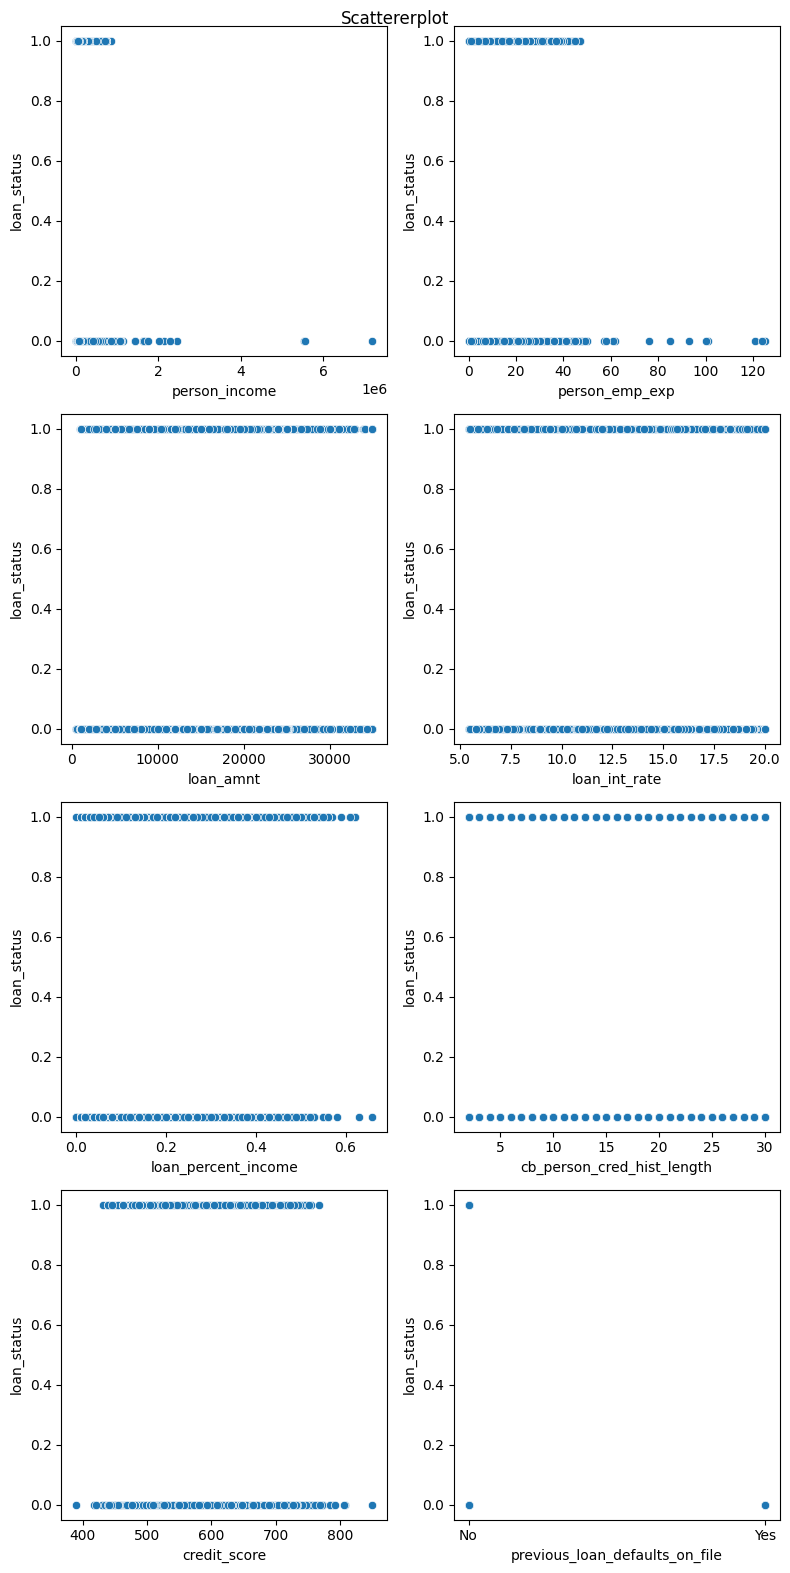

In [ ]:
fig,axes=plt.subplots(4,2,figsize=(8,16))
plt.suptitle("Scattererplot")

sns.scatterplot(x="person_income",y="loan_status",data=df,ax=axes[0,0])
sns.scatterplot(x="person_emp_exp",y="loan_status",data=df,ax=axes[0,1])
sns.scatterplot(x="loan_amnt",y="loan_status",data=df,ax=axes[1,0])
sns.scatterplot(x="loan_int_rate",y="loan_status",data=df,ax=axes[1,1])
sns.scatterplot(x="loan_percent_income",y="loan_status",data=df,ax=axes[2,0])
sns.scatterplot(x="cb_person_cred_hist_length",y="loan_status",data=df,ax=axes[2,1])
sns.scatterplot(x="credit_score",y="loan_status",data=df,ax=axes[3,0])
sns.scatterplot(x="previous_loan_defaults_on_file",y="loan_status",data=df,ax=axes[3,1])

plt.tight_layout()
plt.show()

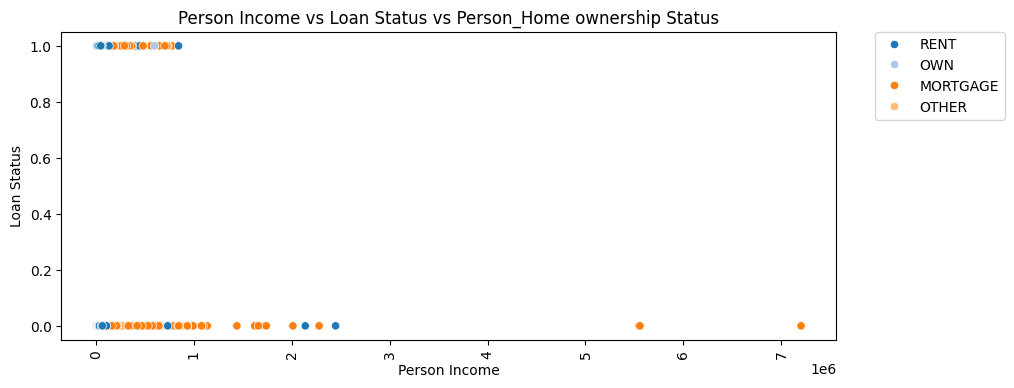

In [9]:
plt.figure(figsize=(10,4))
sns.scatterplot(x="person_income",y="loan_status",hue="person_home_ownership",palette="tab20",data=df)
plt.title("Person Income vs Loan Status vs Person_Home ownership Status")
plt.xlabel("Person Income")
plt.ylabel("Loan Status")
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()

In [7]:
df["person_gender"]=df["person_gender"].astype("category")
df["person_gender"]=df["person_gender"].cat.codes
df["person_education"]=df["person_education"].astype("category")
df["person_education"]=df["person_education"].cat.codes
df["person_home_ownership"]=df["person_home_ownership"].astype("category")
df["person_home_ownership"]=df["person_home_ownership"].cat.codes
df["loan_intent"]=df["loan_intent"].astype("category")
df["loan_intent"]=df["loan_intent"].cat.codes
df["previous_loan_defaults_on_file"]=df["previous_loan_defaults_on_file"].astype("category")
df["previous_loan_defaults_on_file"]=df["previous_loan_defaults_on_file"].cat.codes

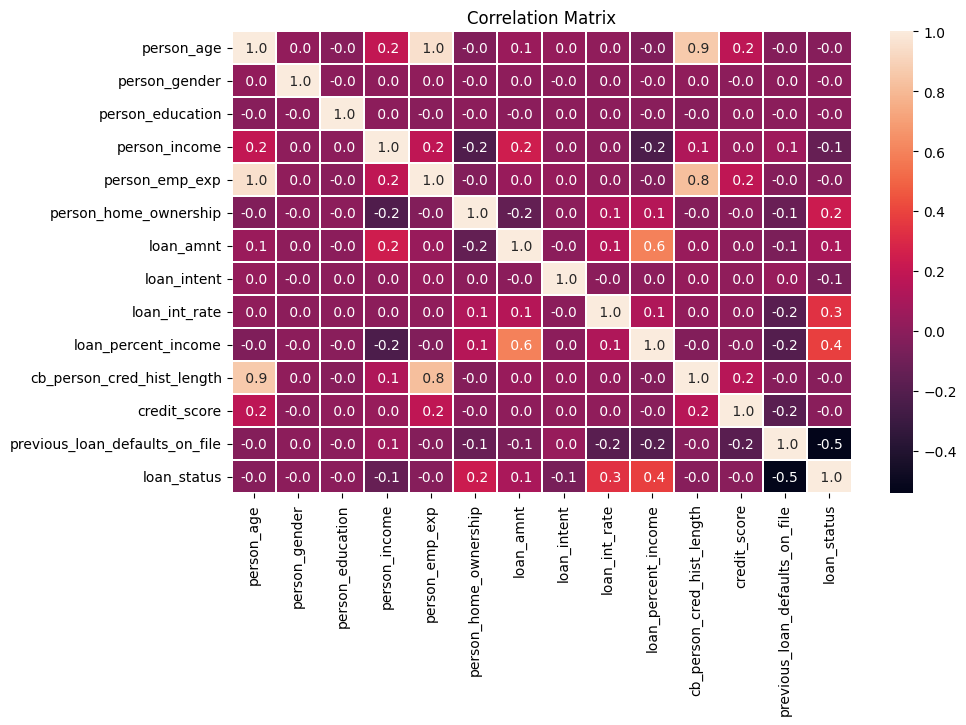

In [8]:
plt.figure(figsize=(10,6))
corr=df.corr()
sns.heatmap(corr,annot=True,fmt=" .1f",linewidth=.10)
plt.title("Correlation Matrix")
plt.show()

PREDICTIVE MODEL BUILDING

In [ ]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1


In [ ]:
df.shape

(45000, 14)

In [ ]:
X=df.iloc[:,:13]
X

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,0,47971.0,6,3,15000.0,3,15.66,0.31,3.0,645,0
44996,37.0,0,0,65800.0,17,3,9000.0,2,14.07,0.14,11.0,621,0
44997,33.0,1,0,56942.0,7,3,2771.0,0,10.02,0.05,10.0,668,0
44998,29.0,1,1,33164.0,4,3,12000.0,1,13.23,0.36,6.0,604,0


In [ ]:
Y=df.iloc[:,13]
Y

,loan_status
0,1
1,0
2,1
3,1
4,1
...,...
44995,1
44996,1
44997,1
44998,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,max_depth=5,random_state=42)
model.fit(X_train,Y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
pred=model.predict(X_test)
pred

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,pred)

0.9113333333333333

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=np.array(X)
X_train_scaled=scaler.fit_transform(X_train)
input_data=(23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0)
input_data=np.array(input_data)
input_data=input_data.reshape(1,-1)
input_data_scaled=scaler.transform(input_data)
prediction=model.predict(input_data_scaled)
print(prediction)

if prediction[0]==0:
  print("Loan Rejected")
else:
  print("Loan Approved")

[1]
Loan Approved
